## Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("height-weight.csv")

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


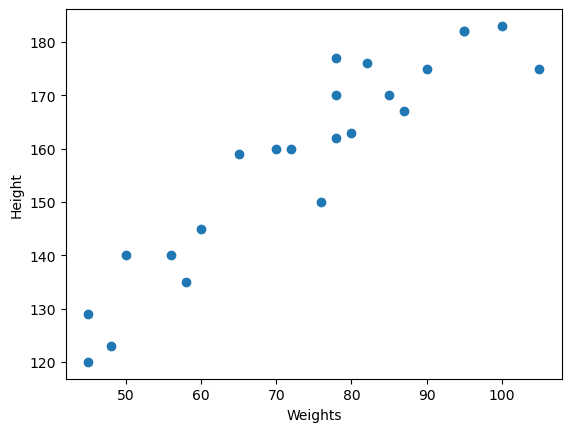

In [4]:
plt.scatter(df["Weight"],df["Height"])
plt.xlabel("Weights")
plt.ylabel("Height")
plt.show()

In [5]:
## Divide our Dataset into independent and dependent feature
X = df[['Weight']] # independent feature

y = df['Height']    ## Dependent feature

In [6]:
X.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [9]:
X.shape

(23, 1)

In [10]:
X_train.shape

(18, 1)

In [11]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [12]:
df


,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [13]:
## standardize the dataset Train independent data
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
X_train.head()

,Weight
12,105
1,58
13,100
5,78
2,48


In [16]:
X_train = scaler.fit_transform(X_train)

In [17]:
X_test = scaler.fit_transform(X_test)

In [18]:
X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [19]:
y_train

12    175
1     135
13    183
5     162
2     123
11    182
20    129
3     145
4     160
18    150
16    140
21    140
22    160
7     175
10    176
14    170
19    167
6     163
Name: Height, dtype: int64

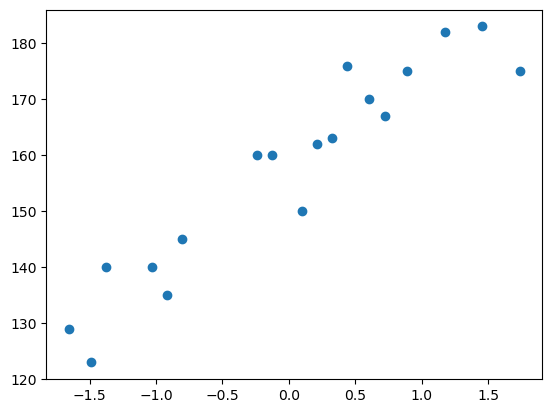

In [20]:
plt.scatter(X_train,y_train)

In [21]:
## Train the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression

In [22]:
regression = LinearRegression()

In [23]:
regression.fit(X_train,y_train)

LinearRegression()

In [24]:
print("slop or coefficient of weights is : ",regression.coef_)
print("Intercept :",regression.intercept_)

slop or coefficient of weights is :  [17.03440872]
Intercept : 157.5


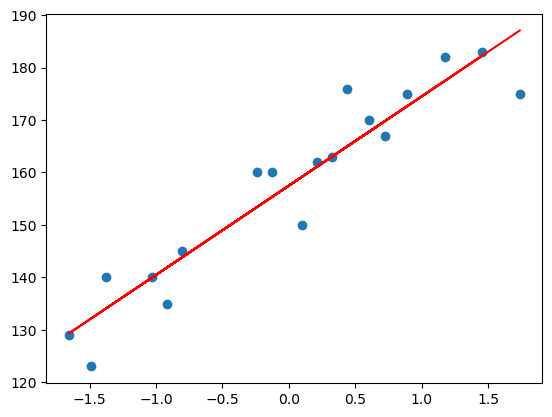

In [25]:
plt.scatter(X_train,y_train)
plt.plot(X_train, regression.predict(X_train),'r')

### Prediction of train data
  1. predicted height output = intercept + coef_(Weights)
  2. y_pred_train = 157.5 + 17.03(x_train)

### Prediction of test data
  1. predicted height output = intercept + coef_(Weights)
  2. y_pred_test = 157.5 + 17.03(x_test)

In [26]:
y_pred_test = regression.predict(X_test)

In [27]:
y_pred_test,y_test

(array([163.44962265, 163.44962265, 129.59832137, 180.88817179,
        150.11426154]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

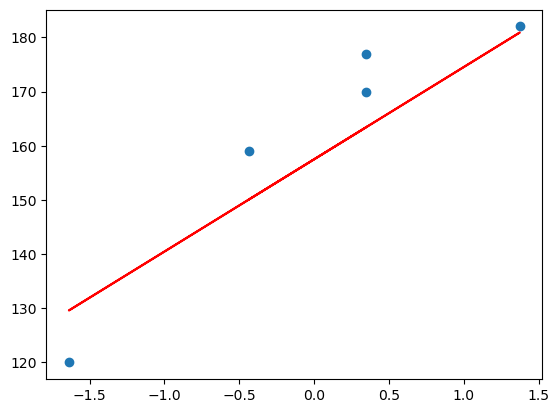

In [28]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regression.predict(X_test),'r')

## Performance Metrics

## MSE,MAE,RMSE
## R square and adjusted R square

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [30]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print("MSE",mse)
print("MAE",mae)
print("RMSE",rmse)

MSE 79.76809057832979
MAE 7.9393285483063725
RMSE 8.931298370244372


## R square
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination

SSR	=	sum of squares of residuals

SST	=	total sum of squares

In [31]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)

In [32]:
score

0.8379487839705635

## Adjusted R Square

**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model

n: The number of observations

k: The number of predictor variables

In [33]:
## display adjusted R-squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7839317119607513

In [34]:
regression

LinearRegression()

In [35]:
## new data point weight is 80

scaled_weight = scaler.transform([[80]])
scaled_weight

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.46970909]])

In [36]:
scaled_weight[0]

array([0.46970909])

In [37]:
print("The height prediction for weight 80 kg is :",regression.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is : [165.50121667]


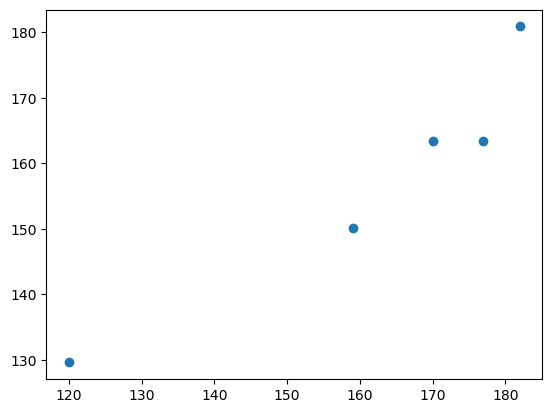

In [38]:
## Assumptions
## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)

In [39]:
## Residuals
residuals=y_test-y_pred_test
residuals

15    13.550377
9      6.550377
0     -9.598321
8      1.111828
17     8.885738
Name: Height, dtype: float64

C:\Users\shrun\AppData\Local\Temp\ipykernel_1388\2747191050.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

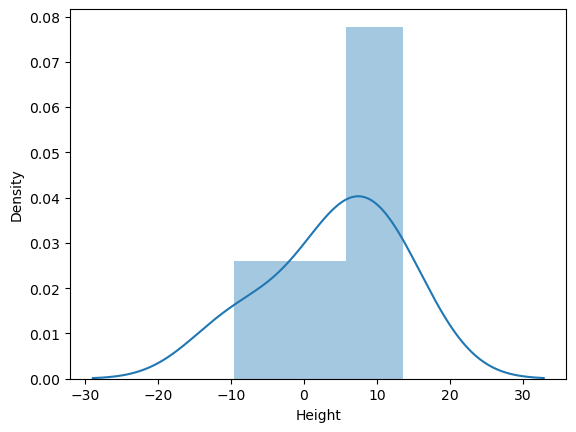

In [40]:
## plot this residuals
import seaborn as sns
sns.distplot(residuals,kde=True)

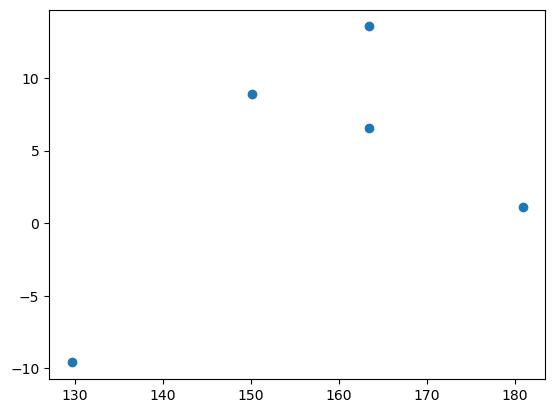

In [41]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)